2. For a given dataset predict number of bikes getting shared based on
different parameters

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
dataset=pd.read_csv("bike_sharing.csv")

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
dataset.shape

(17379, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Data preprocessing

## Data cleaning

In [7]:
dataset=dataset.drop(columns=['instant','dteday'])

### Checking for null values

In [8]:
dataset.isna().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Checking for duplicates

In [9]:
dataset.duplicated().sum()

2

In [10]:
dataset.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Checking for multicolinearity

In [11]:
corrmatrix=dataset.iloc[:,:-1].corr()

<AxesSubplot:>

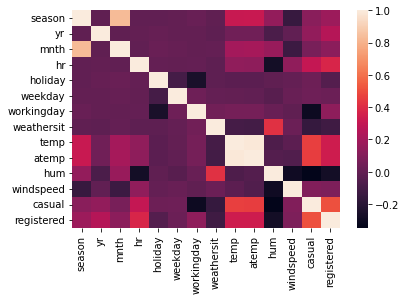

In [12]:
sns.heatmap(corrmatrix)

In [13]:
def correlation(dataset,threshold,corrmatrix):
    correlated_col=set()
    for i in range(len(corrmatrix.columns)):
        for j in range(i):
            if abs(corrmatrix.iloc[i,j])>=threshold:
                correlated_col.add(corrmatrix.columns[i])
    return correlated_col

In [14]:
threshold=0.6
corelatedcols=correlation(dataset,threshold,corrmatrix)
corelatedcols

{'atemp', 'mnth'}

### Drop multicolinear columns

In [15]:
dataset=dataset.drop(columns=corelatedcols)

In [16]:
col=dataset.columns

## Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()
dataset=sc.fit_transform(dataset)

In [19]:
dataset=pd.DataFrame(dataset,columns=col)

### Checking for outlier

<AxesSubplot:>

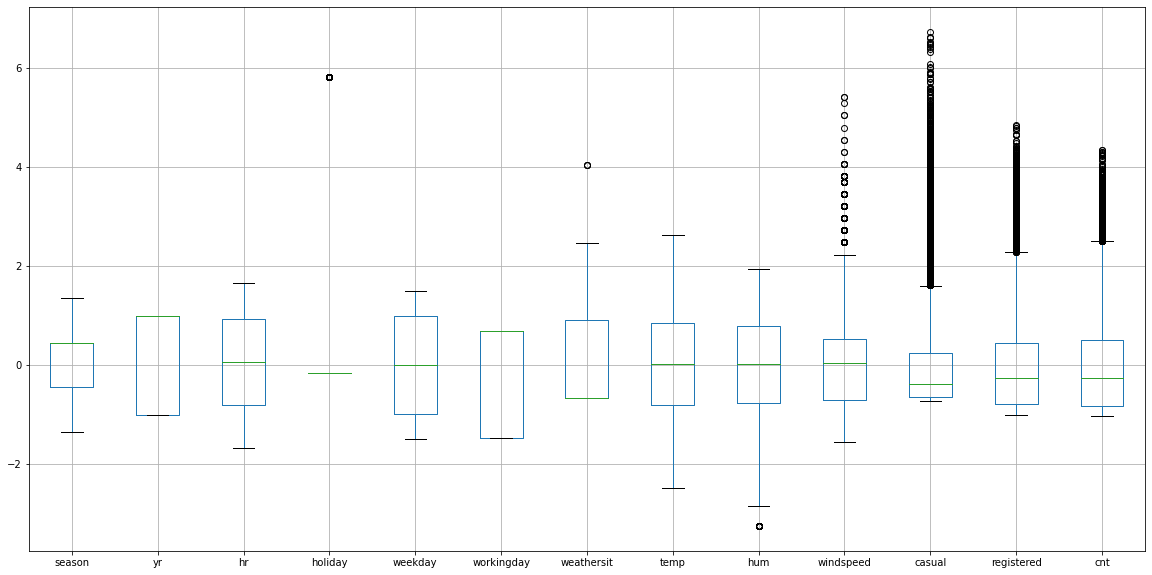

In [20]:
plt.figure(figsize=(20,10))
dataset.boxplot()

### Handling outlier

In [21]:
for i in dataset.columns:
    percentiles = dataset[i].quantile([0.25,0.75]).values
    dataset[i][dataset[i] <= percentiles[0]] = percentiles[0]
    dataset[i][dataset[i] >= percentiles[1]] = percentiles[1]

<AxesSubplot:>

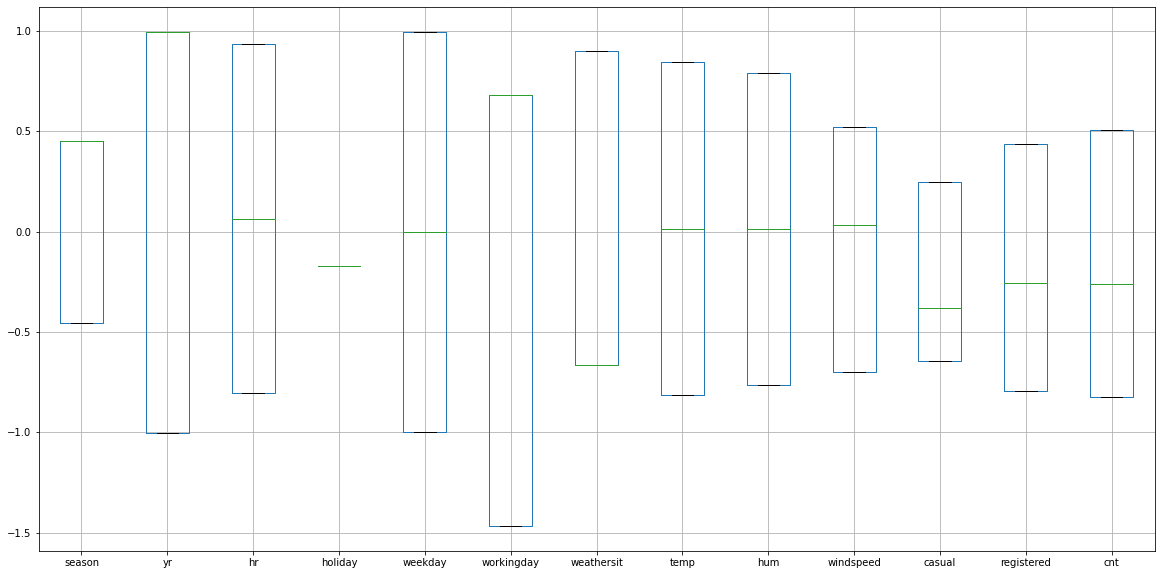

In [22]:
plt.figure(figsize=(20,10))
dataset.boxplot()

In [23]:
dataset.shape

(17379, 13)

In [24]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1].values
y=y.reshape(-1,1)

## Data train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13034, 12), (4345, 12), (13034, 1), (4345, 1))

## Model building

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [29]:
dr=DecisionTreeRegressor(max_depth=9)

In [30]:
dr.fit(x_train,y_train)
y_train_pred=dr.predict(x_train)

In [31]:
r2=r2_score(y_train,y_train_pred)
r2

0.9969585093313922

In [32]:
Mean_Squared_Error=mean_squared_error(y_train,y_train_pred)
Mean_Squared_Error

0.0008880685275793363

[Text(0.48011057173678534, 0.95, 'X[11] <= -0.194\nsquared_error = 0.292\nsamples = 13034\nvalue = -0.196'),
 Text(0.21703074433656958, 0.85, 'X[11] <= -0.557\nsquared_error = 0.047\nsamples = 6828\nvalue = -0.661'),
 Text(0.09641316073354908, 0.75, 'X[11] <= -0.722\nsquared_error = 0.005\nsamples = 4701\nvalue = -0.787'),
 Text(0.05076860841423948, 0.65, 'X[10] <= -0.075\nsquared_error = 0.0\nsamples = 3705\nvalue = -0.819'),
 Text(0.03168824163969795, 0.55, 'X[11] <= -0.775\nsquared_error = 0.0\nsamples = 3694\nvalue = -0.82'),
 Text(0.015911542610571736, 0.45, 'X[10] <= -0.45\nsquared_error = 0.0\nsamples = 3364\nvalue = -0.823'),
 Text(0.008629989212513484, 0.35, 'X[10] <= -0.511\nsquared_error = 0.0\nsamples = 3284\nvalue = -0.824'),
 Text(0.004314994606256742, 0.25, 'X[11] <= -0.782\nsquared_error = 0.0\nsamples = 3180\nvalue = -0.824'),
 Text(0.002157497303128371, 0.15, 'X[10] <= -0.551\nsquared_error = 0.0\nsamples = 3142\nvalue = -0.824'),
 Text(0.0010787486515641855, 0.05, 's

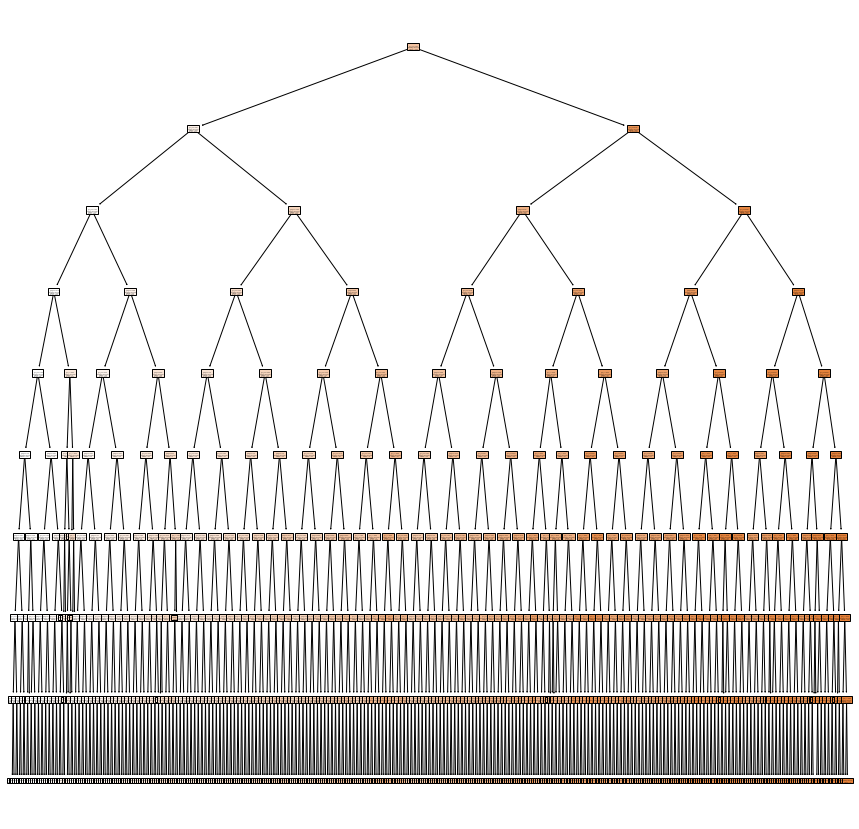

In [33]:
plt.figure(figsize=(15,15))
tree.plot_tree(dr,filled=True)

In [34]:
dr.fit(x_test,y_test)
y_test_pred=dr.predict(x_test)

In [35]:
r2=r2_score(y_test,y_test_pred)
r2

0.9982336252532468

In [36]:
Mean_Squared_Error=mean_squared_error(y_test,y_test_pred)
Mean_Squared_Error

0.000515100921138393